In [15]:
from scipy.optimize import minimize
import numpy as np
import voronotalt as voro

%run formfactor.py
%run debyecalc_Iq.py
%run load_testdata.py
%run mapping_aas.py
%run hydration_shell.py

from load_testdata import load_xyz


import MDAnalysis as mda
from MDAnalysis.coordinates.XYZ import XYZWriter

PDB Atom Map: {'OXT': 'O_', 'OT1': 'O_', 'OT2': 'O', 'OCT1': 'O_', 'OCT2': 'O', 'OT': 'O_', 'O1': 'O_', 'O2': 'O', 'C': 'C', 'O': 'O', 'N': 'NH', 'CA': 'CH'}
Atom Map: {'C': 'C', 'O': 'O', 'N': 'N', 'S': 'S', 'P': 'P', 'MG': 'MG', 'IR': 'IR', 'FE': 'FE', 'CU': 'CU', 'ZN': 'ZN', 'CA': 'CA', 'CR': 'Cr', 'CL': 'CL', 'SE': 'SE', 'H': 'H', 'I': 'I', 'IOD': 'I', 'D': 'D'}
PDB Map: {'ALA.CB': 'CH3', 'ARG.CG': 'CH2', 'ARG.CD': 'CH2', 'ARG.CZ': 'C', 'ARG.CB': 'CH2', 'ASN.CB': 'CH2', 'ASN.CG': 'C', 'ASN.OD1': 'O', 'ASN.ND2': 'NH2', 'ASP.CB': 'CH2', 'ASP.CG': 'C', 'CYS.CB': 'CH2', 'CYS.SG': 'SH', 'SEC.CB': 'CH2', 'SEC.SE': 'SEH', 'GLU.CB': 'CH2', 'GLU.CG': 'CH2', 'GLU.CD': 'C', 'GLN.CB': 'CH2', 'GLN.CG': 'CH2', 'GLN.CD': 'C', 'GLN.OE1': 'O', 'GLN.NE2': 'NH2', 'GLY.CA': 'CH2', 'HIS.CB': 'CH2', 'HIS.CG': 'C', 'HIS.ND1': 'N', 'HIS.CD2': 'Csp2H', 'HIS.CE1': 'Csp2H', 'HIS.NE2': 'NH', 'ILE.CB': 'CH', 'ILE.CG1': 'CH2', 'ILE.CG2': 'CH3', 'ILE.CD1': 'CH3', 'ILE.CD': 'CH3', 'LEU.CB': 'CH2', 'LEU.CG': 'CH',

In [60]:

# Load the PQR file
u = mda.Universe("/home/isabel/Documents/Input_Marco/confout.pqr")

# Write to XYZ format
with XYZWriter("marco_output.xyz", n_atoms=len(u.atoms)) as writer:
    writer.write(u)

# Read the XYZ file
with open("marco_output.xyz", "r") as file:
    lines = file.readlines()

# Skip the first two lines (header) and parse the data
data = []
for line in lines[2:]:
    # Split the line by whitespace and filter out empty strings
    split_line = line.split()
    if len(split_line) >= 4:  # Ensure the line has at least 4 elements
        data.append(split_line)

# Extract amino acids and coordinates
amino_acids = [line[0] for line in data]  # First column: amino acid/atom names
coordinates = np.array([[float(line[1]), float(line[2]), float(line[3])] for line in data])  # x, y, z coordinates

# Print results for verification
print("Amino acids:", amino_acids)
print("Coordinates:\n", coordinates)
# Remove the first letter 'H' from amino acids with 4 letters
amino_acids = [aa[1:] if len(aa) == 4 and aa.startswith('H') else aa for aa in amino_acids]

# Print updated amino acids for verification
print("Updated Amino acids:", amino_acids)
# Remove the first and last amino acid
amino_acids = amino_acids[1:-1]
coordinates = coordinates[1:-1]

# Print the updated lists for verification
print("Amino acids after removal:", amino_acids)
print("Coordinates after removal:\n", coordinates)

Amino acids: ['HNTR', 'ASP', 'THR', 'HIS', 'HLYS', 'SER', 'GLU', 'ILE', 'ALA', 'HIS', 'HARG', 'PHE', 'HLYS', 'ASP', 'LEU', 'GLY', 'GLU', 'GLU', 'HIS', 'PHE', 'HLYS', 'GLY', 'LEU', 'VAL', 'LEU', 'ILE', 'ALA', 'PHE', 'SER', 'GLN', 'HTYR', 'LEU', 'GLN', 'GLN', 'HCYS', 'PRO', 'PHE', 'ASP', 'GLU', 'HIS', 'VAL', 'HLYS', 'LEU', 'VAL', 'ASN', 'GLU', 'LEU', 'THR', 'GLU', 'PHE', 'ALA', 'HLYS', 'THR', 'CYX', 'VAL', 'ALA', 'ASP', 'GLU', 'SER', 'HIS', 'ALA', 'GLY', 'CYX', 'GLU', 'HLYS', 'SER', 'LEU', 'HIS', 'THR', 'LEU', 'PHE', 'GLY', 'ASP', 'GLU', 'LEU', 'CYX', 'HLYS', 'VAL', 'ALA', 'SER', 'LEU', 'HARG', 'GLU', 'THR', 'HTYR', 'GLY', 'ASP', 'MET', 'ALA', 'ASP', 'CYX', 'CYX', 'GLU', 'HLYS', 'GLN', 'GLU', 'PRO', 'GLU', 'HARG', 'ASN', 'GLU', 'CYX', 'PHE', 'LEU', 'SER', 'HIS', 'HLYS', 'ASP', 'ASP', 'SER', 'PRO', 'ASP', 'LEU', 'PRO', 'HLYS', 'LEU', 'HLYS', 'PRO', 'ASP', 'PRO', 'ASN', 'THR', 'LEU', 'CYX', 'ASP', 'GLU', 'PHE', 'HLYS', 'ALA', 'ASP', 'GLU', 'HLYS', 'HLYS', 'PHE', 'TRP', 'GLY', 'HLYS', 'HTYR

In [58]:
poly_ff = read_poly_coefficients('../poly_atomic.csv')
print(poly_ff)

[['ALA' 0 37.99362301706037]
 ['ALA' 1 0.0]
 ['ALA' 2 -18.86380331309984]
 ['ALA' 3 -0.2758124374784611]
 ['ALA' 4 5.82280058685291]
 ['ALA' 5 -0.9573284214725696]
 ['ALA' 6 -0.1843318859570364]
 ['ARG' 0 83.96931237523458]
 ['ARG' 1 0.0]
 ['ARG' 2 -278.8478294207628]
 ['ARG' 3 490.58929669301415]
 ['ARG' 4 -384.0645002747333]
 ['ARG' 5 143.69567287376765]
 ['ARG' 6 -20.79046835627335]
 ['ASN' 0 59.98211626450698]
 ['ASN' 1 0.0]
 ['ASN' 2 -40.54492834182936]
 ['ASN' 3 -32.39209044772834]
 ['ASN' 4 73.40845254223012]
 ['ASN' 5 -37.167341271226]
 ['ASN' 6 6.100794494762529]
 ['ASP' 0 59.98257839879635]
 ['ASP' 1 0.0]
 ['ASP' 2 -37.42473929418985]
 ['ASP' 3 -37.96216454926966]
 ['ASP' 4 77.2131780640002]
 ['ASP' 5 -38.25055143007612]
 ['ASP' 6 6.198007474681488]
 ['CYS' 0 53.98475025825209]
 ['CYS' 1 0.0]
 ['CYS' 2 -28.55763518208107]
 ['CYS' 3 -34.94893362606055]
 ['CYS' 4 63.48693529075937]
 ['CYS' 5 -29.835485023107186]
 ['CYS' 6 4.608548513132565]
 ['GLN' 0 68.00039428754978]
 ['GLN' 

In [61]:
debye = DebyeCalculator()
#xyz_file='marco_output.xyz'
#amino_acids, coordinates = load_xyz(xyz_file)
water_pos = generate_hydration_shell(coordinates, cell_size=5.0, padding=12.0, min_dist=5.0, shell_width=5.0)
q_values = np.linspace(0, 0.5, 100)
        # If using amino acid volumes from voronota, adjust form factors
#if Explicit_dummy:
             # Calculate amino acid volumes
#aa_volumes = debye.amino_acid_volume(coordinates, amino_acids)
#aa_FormFactors = np.array([debye.getfitted_ff(aa, q_values, poly_ff) - debye.overallexpansion_factor(q_values, aa_volumes[i])*self.dummyFactor(q_values, aa_volumes[i]) for i, aa in enumerate(amino_code)])

aa_FormFactors = np.array([debye.getfitted_ff(aa, q_values, poly_ff) for aa in amino_acids])
    # Get water form factors
water_FormFactors = np.array([debye.getfitted_ff('H2O', q_values, poly_ff) for w in range(len(water_pos))])
    # Calculate I(q) using the Debye formula
Iq_values = debye.debye_formula(coordinates, q_values, aa_FormFactors, water_pos, water_FormFactors)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [11]:
# read dat file
mdata= np.loadtxt('/home/isabel/Documents/Input_Marco/debye.dat')

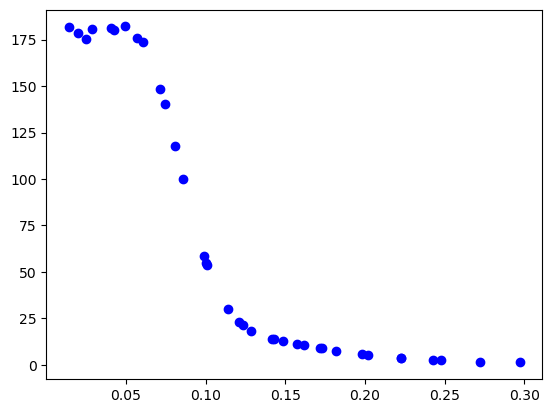

In [19]:
plt.plot(mdata[:,0], mdata[:,1],'bo', label='Marco Data')